In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle


csv_file_path = 'autism_combinations_predictions_sampled1.csv'
df = pd.read_csv(csv_file_path)


df.replace({'yes': 1, 'no': 0, 'not applicable': np.nan}, inplace=True)
X = df.drop(columns=['Prediction'])
y = df['Prediction'].apply(lambda x: 1 if x == 'Autism' else 0)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train_clean = X_train.dropna(axis=1, how='any')
X_test_clean = X_test[X_train_clean.columns]


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)


grid_search.fit(X_train_clean, y_train)

print(f"Best Parameters: {grid_search.best_params_}")


best_rf = grid_search.best_estimator_


best_rf.fit(X_train_clean, y_train)


y_pred = best_rf.predict(X_test_clean)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

model_file_path = 'random_forest_model2.pkl'
with open(model_file_path, 'wb') as model_file:
    pickle.dump(best_rf, model_file)

print(f"Model saved as {model_file_path}")


Fitting 3 folds for each of 162 candidates, totalling 486 fits


C:\Users\nipun\AppData\Local\Programs\Anaconda\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.99872
Confusion Matrix:
[[ 98215    640]
 [     0 401145]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     98855
           1       1.00      1.00      1.00    401145

    accuracy                           1.00    500000
   macro avg       1.00      1.00      1.00    500000
weighted avg       1.00      1.00      1.00    500000

Model saved as random_forest_model2.pkl


[learning_curve] Training set sizes: [ 133333  266666  399999  533333  666666  799999  933333 1066666 1199999
 1333333]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed: 10.8min remaining: 10.8min
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 18.4min finished


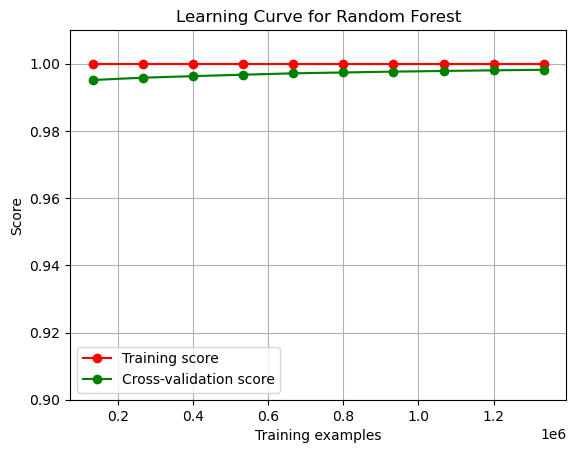

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import pickle

# Load the pre-trained model
model_file_path = 'random_forest_model2.pkl'
with open(model_file_path, 'rb') as model_file:
    best_rf = pickle.load(model_file)

# Load the data
csv_file_path = 'autism_combinations_predictions_sampled1.csv'
df = pd.read_csv(csv_file_path)

# Preprocess the data
df.replace({'yes': 1, 'no': 0, 'not applicable': np.nan}, inplace=True)
X = df.drop(columns=['Prediction'])
y = df['Prediction'].apply(lambda x: 1 if x == 'Autism' else 0)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Clean the training and testing data
X_train_clean = X_train.dropna(axis=1, how='any')
X_test_clean = X_test[X_train_clean.columns]

# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_rf, X_train_clean, y_train, cv=3, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), verbose=2
)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve for Random Forest")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.ylim(0.9, 1.01)
plt.grid()

# Plot the learning curve
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")
plt.show()
